In [12]:
import pandas as pd

file_path = "C:/Users/Ajla/Downloads/fake reviews dataset.csv"
df = pd.read_csv(file_path)
print(df.head())

             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  


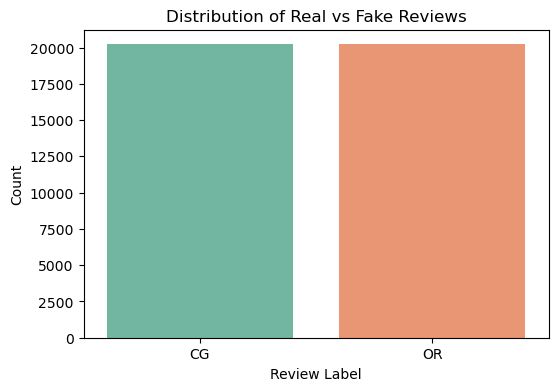

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2', hue='label')
plt.title("Distribution of Real vs Fake Reviews")
plt.xlabel("Review Label")
plt.ylabel("Count")
plt.savefig('rating.png', format='png')
plt.show()

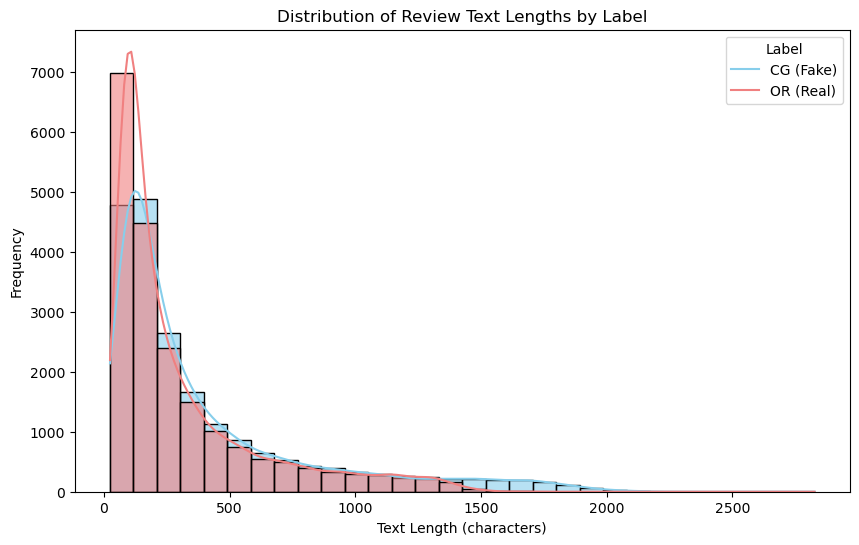

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
df['text_length'] = df['text_'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=30, kde=True, hue='label', palette={'CG': 'lightcoral', 'OR': 'skyblue'}, alpha=0.6)
plt.title("Distribution of Review Text Lengths by Label")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.legend(title='Label', labels=['CG (Fake)', 'OR (Real)'])
plt.savefig("text_length_by_label.png", format='png')
plt.show()

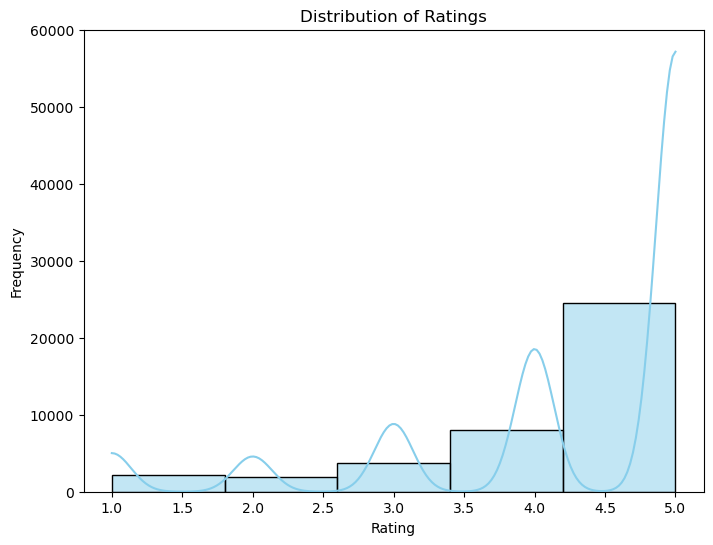

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig("ratings.png", format='png')
plt.show()

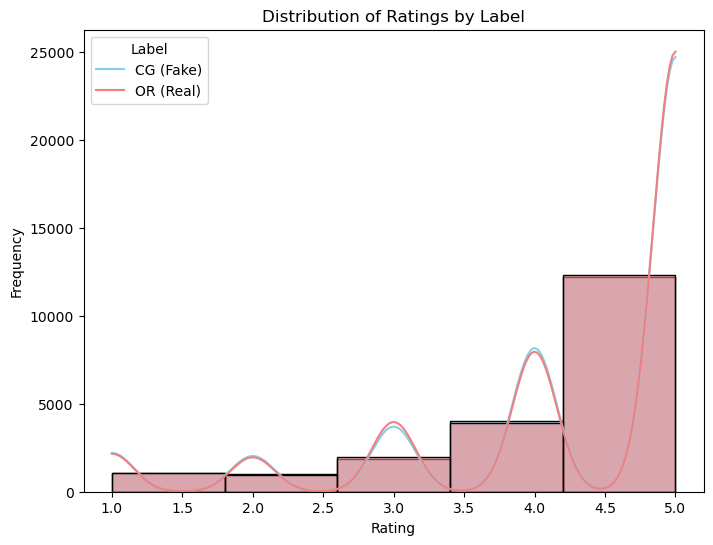

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating', bins=5, kde=True, hue='label', palette={'CG': 'lightcoral', 'OR': 'skyblue'}, alpha=0.6)
plt.title("Distribution of Ratings by Label")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend(title='Label', labels=['CG (Fake)', 'OR (Real)'])
plt.savefig("ratings_by_label.png", format='png')
plt.show()

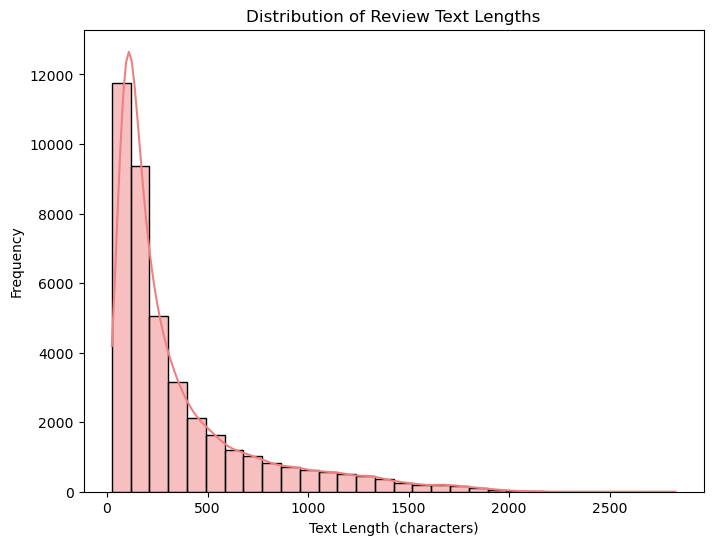

In [13]:
df['text_length'] = df['text_'].apply(lambda x: len(x))
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='lightcoral')
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.savefig("text_length.png", format='png')
plt.show()

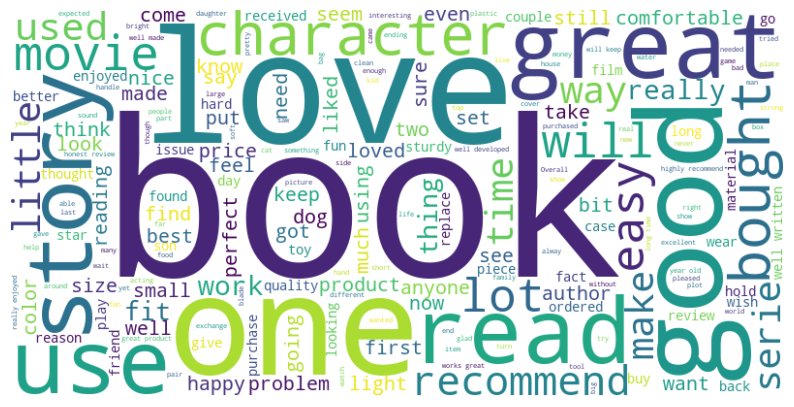

In [15]:
from wordcloud import WordCloud
all_reviews = ' '.join(df['text_'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

label
CG    4.259893
OR    4.253265
Name: rating, dtype: float64


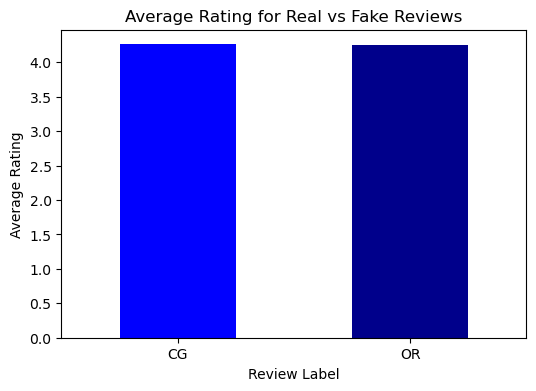

In [17]:
avg_rating = df.groupby('label')['rating'].mean()
print(avg_rating)

plt.figure(figsize=(6, 4))
avg_rating.plot(kind='bar', color=['blue', 'darkblue'])
plt.title("Average Rating for Real vs Fake Reviews")
plt.xlabel("Review Label")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.savefig('average_rating.png',format='png')
plt.show()

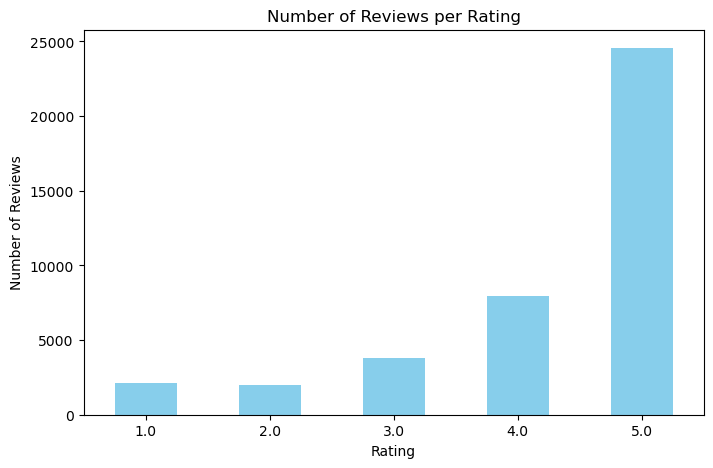

rating
1.0     2155
2.0     1967
3.0     3786
4.0     7965
5.0    24559
Name: count, dtype: int64


In [47]:
rating_counts = df['rating'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.savefig('ratings.png', format='png')
plt.show()

print(rating_counts)

In [17]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [21]:
df.columns

Index(['category', 'rating', 'label', 'text_', 'text_length'], dtype='object')

In [22]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

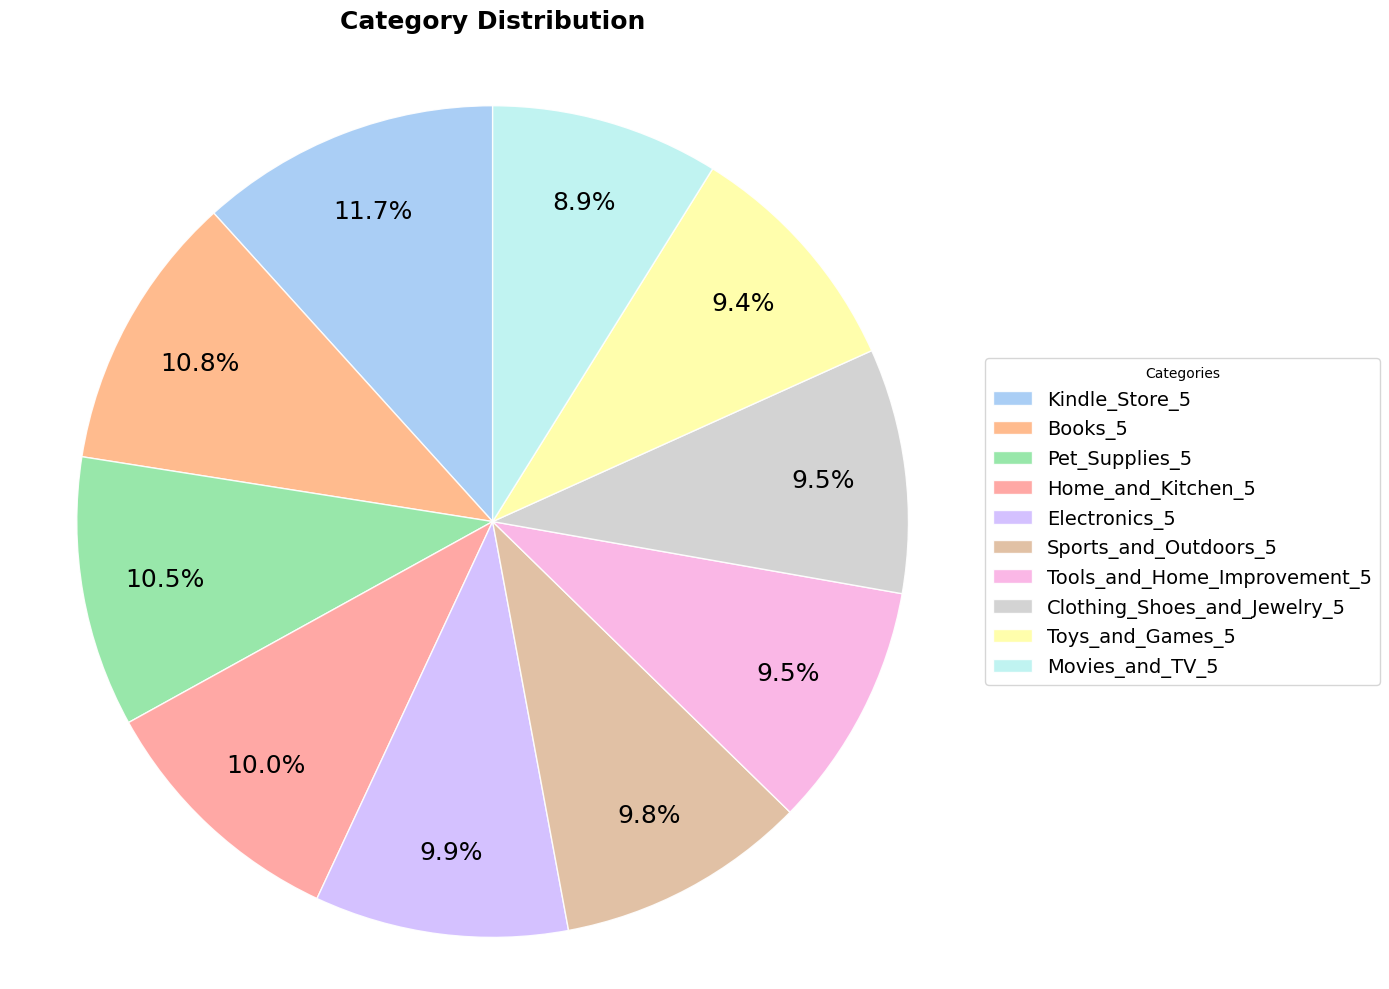

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = df['category'].value_counts()
colors = sns.color_palette('pastel')[0:len(value_counts)]
plt.figure(figsize=(14, 10))

wedges, texts, autotexts = plt.pie(
    value_counts,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    pctdistance=0.8,
    textprops={'fontsize': 18, 'color': 'black'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'alpha': 0.9}
)

plt.legend(wedges, value_counts.index,
          title='Categories',
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=14)

plt.title('Category Distribution\n', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig('category_piechart.jpg', dpi=300, bbox_inches='tight', transparent=True)
plt.savefig('category_piechart.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
df['rating'].mean()

4.256578947368421

In [33]:
#---------------------------------------------------------------

#                   MACHINE LEARNING PART

#---------------------------------------------------------------

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import logging

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import logging

tqdm.pandas()
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Vectorizing text data...")
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(tqdm(df['text_'], desc="Vectorizing"))

y = df['label'] 

logging.info("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logging.info("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

logging.info("Evaluating model...")
y_pred = model.predict(X_test)
logging.info("\n" + classification_report(y_test, y_pred))
logging.info("Confusion Matrix:\n%s", confusion_matrix(y_test, y_pred))

# Sample predictions with confidence score
logging.info("Generating sample predictions...")
sample_texts = df['text_'].sample(5, random_state=1)
sample_vectors = vectorizer.transform(tqdm(sample_texts, desc="Predicting"))
probs = model.predict_proba(sample_vectors)

for text, prob in zip(sample_texts, probs):
    label = model.classes_[np.argmax(prob)]
    confidence = np.max(prob)
    print(f"\nText: {text[:100]}...")
    print(f"Predicted: {label} (Confidence: {confidence:.2f})")

2025-05-07 12:43:26,044 - INFO - Vectorizing text data...
Vectorizing: 100%|██████████| 40432/40432 [00:02<00:00, 15995.61it/s]
2025-05-07 12:43:28,809 - INFO - Splitting data...
2025-05-07 12:43:28,822 - INFO - Training Logistic Regression model...
2025-05-07 12:43:29,045 - INFO - Evaluating model...
2025-05-07 12:43:29,333 - INFO - 
              precision    recall  f1-score   support

          CG       0.87      0.85      0.86      4016
          OR       0.85      0.88      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087

2025-05-07 12:43:29,380 - INFO - Confusion Matrix:
[[3398  618]
 [ 508 3563]]
2025-05-07 12:43:29,380 - INFO - Generating sample predictions...
Predicting: 100%|██████████| 5/5 [00:00<00:00, 4912.51it/s]


Text: Excellent value.  Easy to use.  Buy it.works great.Nice little light.  Works as advertised.  The pla...
Predicted: CG (Confidence: 0.98)

Text: I really enjoyed this book.  It was surprising, deep, interesting, humorous and encouraging.  At fir...
Predicted: OR (Confidence: 0.78)

Text: I loved this at first, but it didn't last. I did a lot of research and decided to get an extra one f...
Predicted: CG (Confidence: 0.97)

Text: Did not like the fit, it was too long. I will return it....
Predicted: OR (Confidence: 0.71)

Text: I am so relieved she does not fight to put it on. It keeps her from jumping into the front seat and ...
Predicted: OR (Confidence: 0.96)


In [3]:
df = pd.read_csv("C:/Users/Ajla/Downloads/fake reviews dataset.csv")
df['label'] = df['label'].map({'CG': 0, 'OR': 1})

X = TfidfVectorizer(stop_words='english', max_features=5000).fit_transform(tqdm(df['text_'], desc="Vectorizing"))
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Naive Bayes": MultinomialNB()
}
if xgb_available:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)

results = []

for name, model in models.items():
    logging.info(f"Training {name}...")
    model.fit(X_train, y_train)
    logging.info(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=0)  # 'CG' as the positive class (0)
    rec = recall_score(y_test, y_pred, pos_label=0)     
    f1 = f1_score(y_test, y_pred, pos_label=0)         
    
    logging.info(f"{name} Results:\n{classification_report(y_test, y_pred)}")
    logging.info(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })

results_df = pd.DataFrame(results)
logging.info("All model results:\n%s", results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.5, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()


NameError: name 'TfidfVectorizer' is not defined

In [13]:
df.isnull().sum()

category        0
rating          0
label       40432
text_           0
dtype: int64

In [19]:
import logging
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

df['label'] = df['label'].map({'CG': 0, 'OR': 1})

X = TfidfVectorizer(stop_words='english', max_features=5000).fit_transform(tqdm(df['text_'], desc="Vectorizing"))
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s:%(message)s')

# Train linear SVM
logging.info("Training SVM with linear kernel and probability estimation enabled...")
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Platt scaling
logging.info("Calibrating SVM model with Platt scaling...")
calibrated_svm = CalibratedClassifierCV(svm_model, method='sigmoid')
calibrated_svm.fit(X_train, y_train)

logging.info("Predicting probabilities on test data...")
predicted_probabilities = calibrated_svm.predict_proba(X_test)[:, 1]  # class 1

logging.info("Making class predictions...")
y_pred = calibrated_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)

logging.info("Classification report:\n%s", classification_report(y_test, y_pred))
logging.info(f"Accuracy: {accuracy:.4f}")
logging.info(f"Precision (label=0): {precision:.4f}")
logging.info(f"Recall (label=0): {recall:.4f}")
logging.info(f"F1 Score (label=0): {f1:.4f}")

Vectorizing: 100%|██████████| 40432/40432 [00:02<00:00, 18707.81it/s]
2025-05-07 15:38:17,324 INFO:Training SVM with linear kernel and probability estimation enabled...
2025-05-07 15:52:56,577 INFO:Calibrating SVM model with Platt scaling...
2025-05-07 16:36:00,779 INFO:Predicting probabilities on test data...
2025-05-07 16:37:34,105 INFO:Making class predictions...
2025-05-07 16:39:08,991 INFO:Classification report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4016
           1       0.86      0.87      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087

2025-05-07 16:39:08,991 INFO:Accuracy: 0.8656
2025-05-07 16:39:08,995 INFO:Precision (label=0): 0.8701
2025-05-07 16:39:08,999 INFO:Recall (label=0): 0.8573
2025-05-07 16:39:09,000 INFO:F1 Score (label=0): 0.8637


In [26]:
import logging
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s:%(message)s')
df['label'] = df['label'].map({'CG': 0, 'OR': 1})

X = TfidfVectorizer(stop_words='english', max_features=5000).fit_transform(tqdm(df['text_'], desc="Vectorizing"))
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

logging.info("Creating ensemble model...")
ensemble_model = VotingClassifier(
    estimators=[('logreg', logreg_model), ('rf', rf_model), ('svm', calibrated_svm)],
    voting='soft',
    n_jobs=-1 
)

logging.info("Training ensemble model...")
ensemble_model.fit(X_train, y_train)

logging.info("Making predictions with ensemble model...")
ensemble_predictions = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, ensemble_predictions)
logging.info(f"Ensemble Model Accuracy: {accuracy:.4f}")
logging.info("Classification report:\n%s", classification_report(y_test, ensemble_predictions))

Vectorizing: 100%|██████████| 40432/40432 [00:02<00:00, 19052.83it/s]
2025-05-07 16:45:06,264 INFO:Creating ensemble model...
2025-05-07 16:45:06,264 INFO:Training ensemble model...
2025-05-07 17:32:24,995 INFO:Making predictions with ensemble model...
2025-05-07 17:34:05,448 INFO:Ensemble Model Accuracy: 0.8714
2025-05-07 17:34:05,476 INFO:Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4016
           1       0.87      0.87      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



In [21]:
print(df['label'].unique())

[0 1]


In [48]:
from prediction import predict
print(predict("This movie was fantastic and very heartwarming and I liked it very much."))

{'label': 'OR', 'confidence': 0.92}
